In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

# Data set of seoul bike 

In [2]:
cols = ['bike_count', 'hour', 'temp', 'humidity', 'wind', 'visibility', 'dew_pt_temp', 'radiation', 'rain', 'snow', 'functional']
df = pd.read_csv("C:/ML/SeoulBikeData.csv", header=0, encoding='unicode_escape').drop(['Date', 'Holiday', 'Seasons'], axis=1)
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [3]:
df.columns = cols
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [4]:
df['functional'] = (df['functional'] == 'Yes').astype(int)

In [5]:
df = df[df['hour'] == 12]
df.drop('hour', axis=1, inplace=True)
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


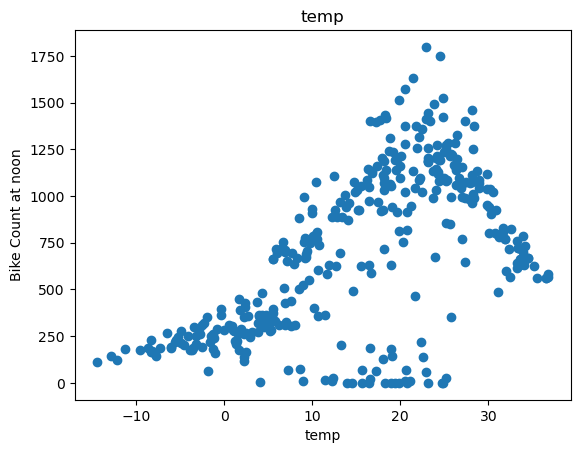

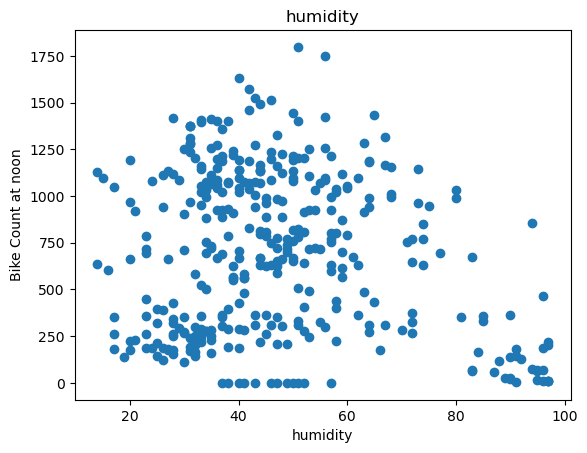

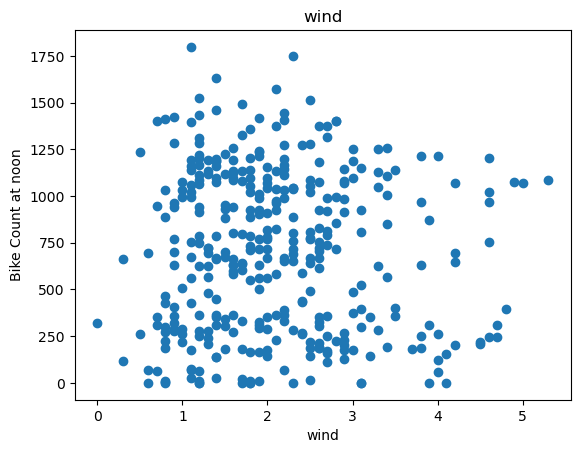

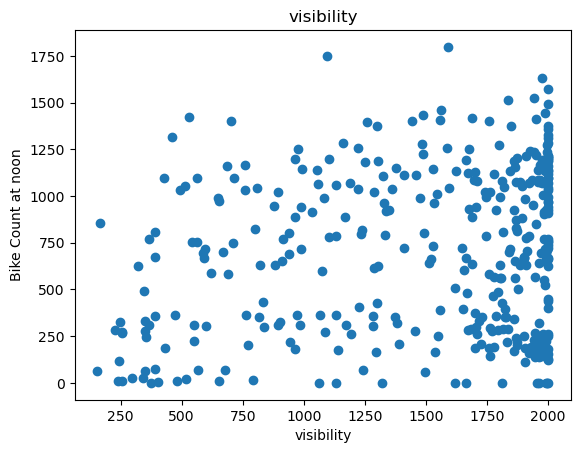

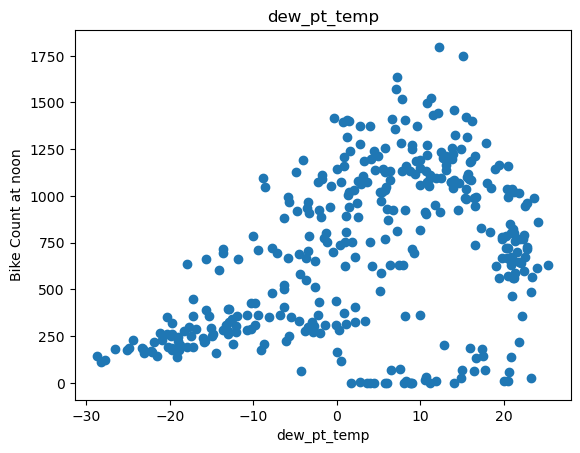

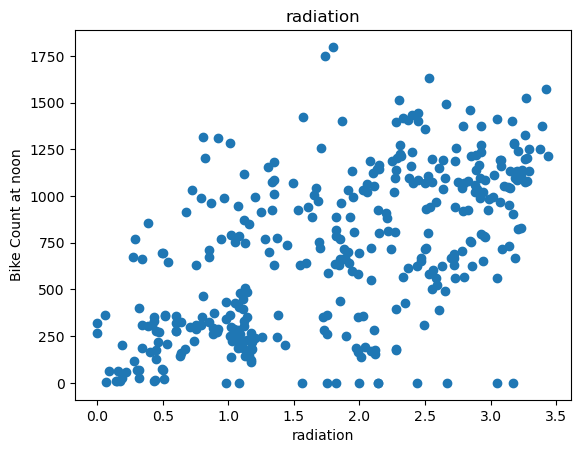

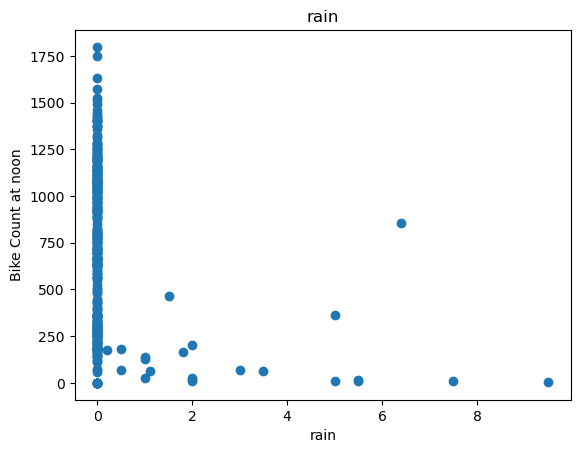

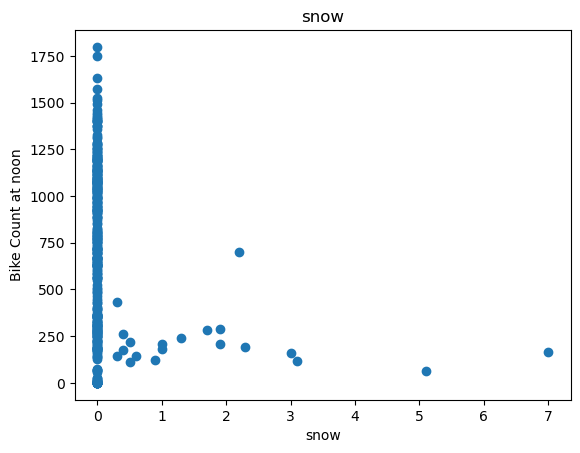

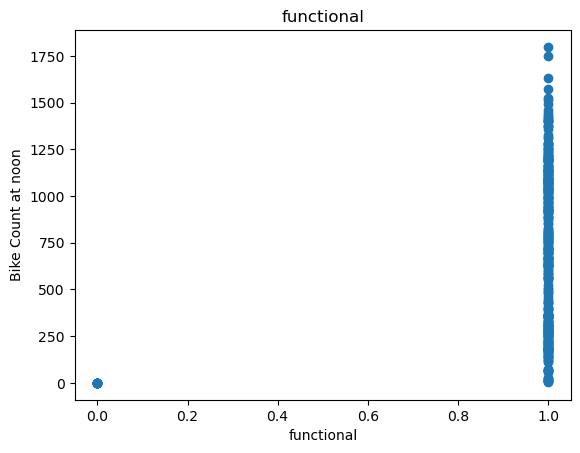

In [6]:
for label in df.columns[1:]:
    plt.scatter(df[label], df['bike_count'])
    plt.title(label)
    plt.xlabel(label)
    plt.ylabel("Bike Count at noon")
    plt.show()

In [7]:
df.drop(['wind', 'visibility', 'functional'], axis=1, inplace=True)
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


# Train/ Valid/ Test dataset

In [8]:
train, val, test = np.split(df.sample(frac=1), [int(0.6 * len(df)), int(0.8 * len(df))])

c:\Users\hamza\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [9]:
train

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
1260,323,3.9,28,-12.9,0.60,0.0,0.0
1956,356,4.0,23,-15.3,2.03,0.0,0.0
6684,1072,27.1,44,13.7,2.80,0.0,0.0
6612,1075,27.5,43,13.7,2.75,0.0,0.0
7116,915,20.8,52,10.5,1.25,0.0,0.0
...,...,...,...,...,...,...,...
1284,180,-11.3,27,-26.6,1.18,0.0,1.0
8244,0,13.9,50,3.6,2.14,0.0,0.0
636,230,-5.5,21,-24.4,1.08,0.0,0.0
3276,1052,15.5,33,-0.7,3.10,0.0,0.0


In [10]:
val

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
492,290,1.9,40,-10.3,1.04,0.0,1.9
3300,1112,18.0,26,-1.8,3.03,0.0,0.0
5124,218,22.4,97,21.8,0.46,0.0,0.0
3252,1105,12.5,53,3.1,2.52,0.0,0.0
4668,1747,24.5,56,15.1,1.74,0.0,0.0
...,...,...,...,...,...,...,...
5748,632,33.6,62,25.3,1.35,0.0,0.0
6156,699,33.9,49,21.6,1.91,0.0,0.0
6492,25,25.2,89,23.2,0.32,2.0,0.0
5724,714,33.7,53,22.7,2.50,0.0,0.0


In [11]:
test

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
5052,1168,26.1,67,19.4,2.15,0.0,0.0
468,209,-3.2,49,-12.4,0.53,0.0,1.9
2460,626,15.5,47,4.2,2.44,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
7140,754,20.3,34,3.9,2.85,0.0,0.0
...,...,...,...,...,...,...,...
8364,963,14.2,45,2.4,1.86,0.0,0.0
5076,858,25.2,94,24.1,0.39,6.4,0.0
7884,1188,18.2,37,3.2,2.25,0.0,0.0
1740,174,-3.9,28,-19.7,2.12,0.0,0.0


In [28]:
def get_xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if not x_labels:
        X = dataframe[[c for c in dataframe.columns if c != y_label]].values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1, 1)
        else:
            X = dataframe[x_labels].values
    y = dataframe[y_label].values.reshape(-1, 1)
    data = np.hstack((X, y))
    return data, X, y

In [13]:
_, X_train_temp, y_train_temp = get_xy(train, 'bike_count', x_labels=['temp'])
_, X_val_temp, y_val_temp = get_xy(val, 'bike_count', x_labels=['temp'])
_, X_test_temp, y_test_temp = get_xy(test, 'bike_count', x_labels=['temp'])

In [14]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [15]:
print(temp_reg.coef_, temp_reg.intercept_)

[[20.13360625]] [371.28271457]


In [16]:
temp_reg.score(X_test_temp, y_test_temp)

0.4217260607495731

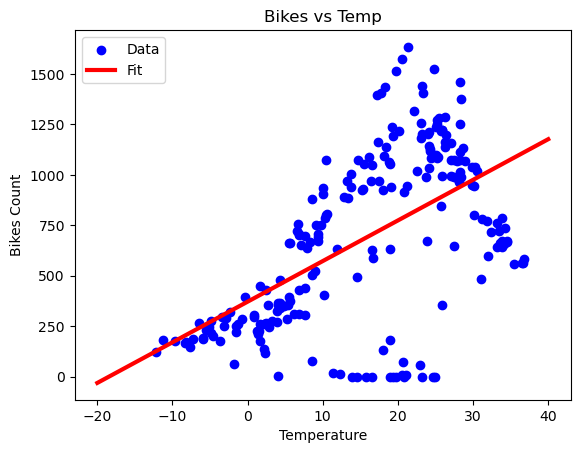

In [22]:
plt.scatter(X_train_temp, y_train_temp, label='Data', color='blue')
x = np.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(x.reshape(-1, 1)), label='Fit', color='red', linewidth=3)
plt.xlabel("Temperature")
plt.title("Bikes vs Temp")
plt.ylabel("Bikes Count")
plt.legend(loc='upper left')

In [18]:
print(f"The function of the linear equation is \n Y = {round(temp_reg.coef_[0][0])} * x + {round(temp_reg.intercept_[0])}")

The function of the linear equation is 
 Y = 20 * x + 371


# Multiple Linear Regression

In [116]:
train, val, test = np.split(df.sample(frac=1), [int(0.6 * len(df)), int(0.8 * len(df))])
_, X_train_all, y_train_all = get_xy(train, 'bike_count')
_, X_valid_all,  y_valid_all = get_xy(val, 'bike_count')
_, X_test_all, y_test_all = get_xy(test, 'bike_count')

c:\Users\hamza\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [123]:
X_train_all.shape[0], y_train_all.shape[0]

(219, 219)

In [36]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [38]:
all_reg.coef_, all_reg.intercept_

(array([[  2.2696601 ,  -7.15319348,  15.23326315, 110.64495985,
         -34.5576281 ,  -3.28115639]]),
 array([750.23501543]))

In [40]:
all_reg.score(X_test_all, y_test_all)

0.5992678621771665

In [138]:
y_pred_linear_regression = all_reg.predict(X_test_all)

# Regression with neural network

In [41]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1, ), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

c:\Users\hamza\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer, 
    tf.keras.layers.Dense(1)
])

In [43]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [62]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.legend(loc='best')
    plt.grid()
    plt.show()

In [63]:
history = temp_nn_model.fit(X_train_temp.reshape(-1, 1),
                            y_train_temp,
                            epochs=1000,
                            verbose=0,
                            validation_data=(X_val_temp, y_val_temp)
                            )

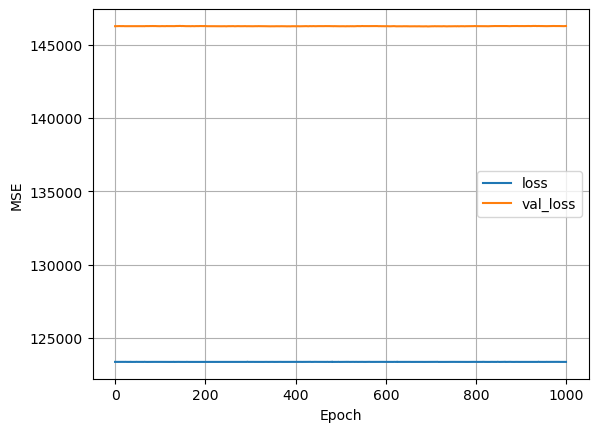

In [64]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


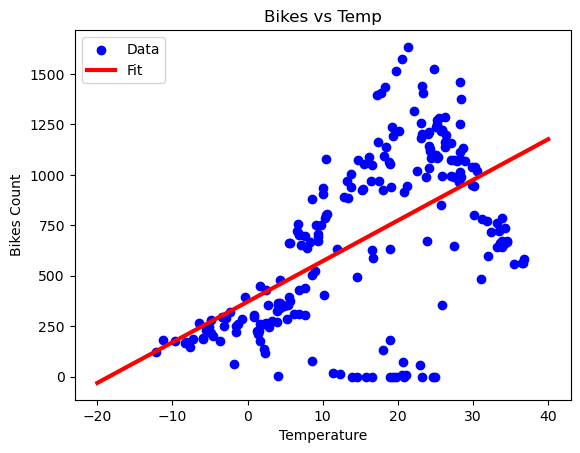

In [66]:
plt.scatter(X_train_temp, y_train_temp, label='Data', color='blue')
x = np.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(x.reshape(-1, 1)), label='Fit', color='red', linewidth=3)
plt.xlabel("Temperature")
plt.title("Bikes vs Temp")
plt.ylabel("Bikes Count")
plt.legend(loc='upper left')

# Neural Network

In [101]:
nn_model = tf.keras.Sequential([
    temp_normalizer, 
    tf.keras.layers.Dense(32, activation='linear'),
    tf.keras.layers.Dense(32, activation='linear'),
    tf.keras.layers.Dense(32, activation='linear'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [102]:
history = nn_model.fit(X_train_temp, 
                       y_train_temp, 
                       epochs=100,
                       validation_data = (X_val_temp, y_val_temp),
                       verbose=0)

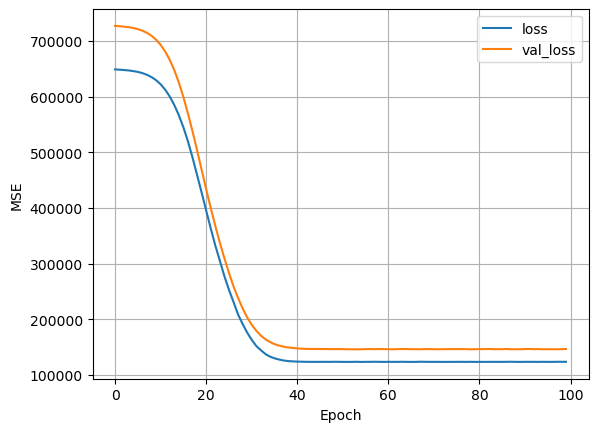

In [103]:
plot_loss(history)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


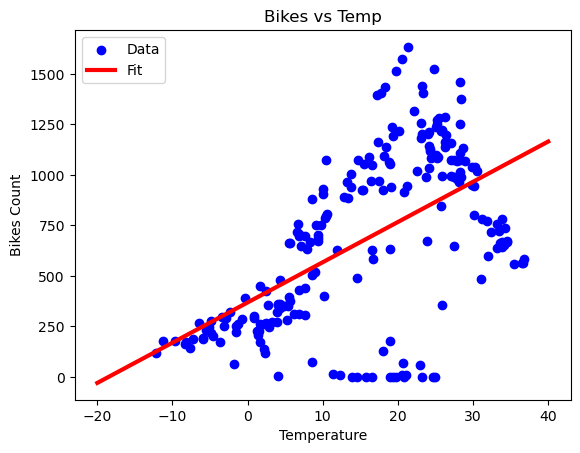

In [106]:
plt.scatter(X_train_temp, y_train_temp, label='Data', color='blue')
x = np.linspace(-20, 40, 1000)
plt.plot(x, nn_model.predict(x.reshape(-1, 1)), label='Fit', color='red', linewidth=3)
plt.xlabel("Temperature")
plt.title("Bikes vs Temp")
plt.ylabel("Bikes Count")
plt.legend(loc='upper left')

In [134]:
import tensorflow as tf

# Define the normalization layer
all_normalizer = tf.keras.layers.Normalization(input_shape=(6, 1), axis=-1)

# Adapt the normalization layer to the training data
all_normalizer.adapt(X_train_all.reshape(-1, 6, 1))

c:\Users\hamza\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [135]:
# Define the neural network model
nn_model = tf.keras.Sequential([
    all_normalizer, 
    tf.keras.layers.Flatten(),  # Add this layer to flatten the input
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
# Compile the model
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [136]:
# Train the model
history = nn_model.fit(X_train_all.reshape(-1, 6, 1), 
                       y_train_all, 
                       epochs=100,
                       validation_data = (X_valid_all, y_valid_all),
                       verbose=0)

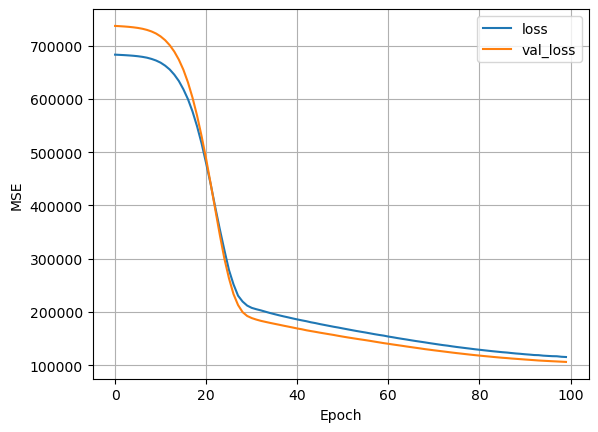

In [137]:
plot_loss(history)

In [139]:
y_pred_linear_regression = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [151]:
def MSE(y_pred, y_real):
    return (np.sqrt(np.square(y_pred - y_real))).mean()
    pass


In [152]:
MSE(y_pred=y_pred_linear_regression, y_real=y_test_all)

218.03480427093984

In [153]:
MSE(y_pred=y_pred_nn, y_real=y_test_all)

247.04870103809932

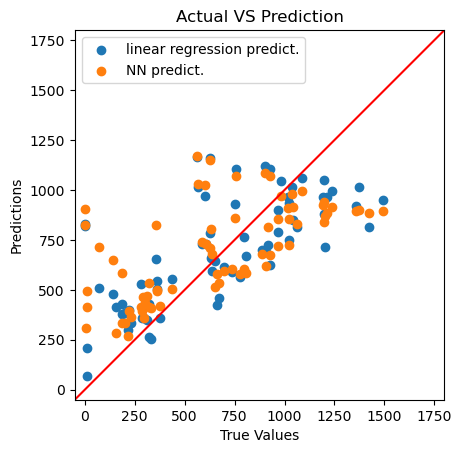

In [164]:
ax = plt.axes(aspect='equal')
plt.scatter(y_test_all, y_pred_linear_regression, label='linear regression predict.')
plt.scatter(y_test_all, y_pred_nn, label='NN predict.')
plt.legend()
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Actual VS Prediction")
lims = [-50, 1800]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims, c='red')
